<a href="https://colab.research.google.com/github/shubham-bhadouria/Airbnb--data-analysis/blob/main/Shubham_Bhadouria_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the airbnb file
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis - Shubham Bhadouria/AIrbnb NYC 2019.csv')
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [4]:
# Number of rows and columns in our dataset
airbnb_df.shape

(48895, 16)

Thus there are 48895 rows and 16 columns in our dataset


In [5]:
# Columns names in our dataset
list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
# Checking for the total null values in every column
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Let's start data cleaning

In [ ]:
# Dropping columns that are not significant for future data exploration 
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)     

Here we drop 'last_review' column because it has 10052 null values and 'id' column and also both of these columns are not sigificant for our data exloration. 

In [7]:
# since 'reviews_per_month' column is an important column for our data exploration but it contain 10052 null values. so to make our exploration easy and reliable, replace all the null values with 0.
airbnb_df['reviews_per_month'].fillna(0,inplace= True)
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Descriptive analysis of airbnb data
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# From the descriptive analysis, it is clear that maximum rental price of hotel/property is $10,000 which is very high. 

In [9]:
# let's check such high rental price hotel belongs to which neighbourhood.
airbnb_df.sort_values('price', ascending= False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,0.00,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,0.00,1,364


From the above table, it can be seen that the almost all the high priced hotel/property belongs to either Manhattan or Brooklyn and after doing some google research, I found that rental price of hotel/property can be as high as 10000.
 Now we have to only deal with the hotel/property whose price is $0.

In [10]:
# Replacing the price of the hotel/property with median values where the price is $0
airbnb_df.loc[airbnb_df['price']==0,'price'] = airbnb_df.loc[airbnb_df['price']!=0,'price'].median()

# *Road Map for data Analysis*
***  What can we learn about different hosts and areas?

   In this section, we try to find out the following:
1.   Top three hosts who has the highest listing avilability of hotel room/
property from each neighbourhood group.
2.   Overall top three hosts irrespective of neighbourhood.

***   What can we learn from predictions? (ex: locations, prices, reviews, etc) 
In this section, we try to find out the following:
1. Most expensive neighbourhood of NYC
2. Each neighbourhood group share of hotels/property and average reviews that each neighborhood group got in newyork.
3. Number of different room types listed in different neighbourhood groups.
4. Top three property/Hotels listing in various neighbourhood groups.
5. Top ten neighbourhoods of Manhattan and Brooklyn(on the basis of number of times they appear in data set) and number of various types of rooms available in these neighbourhoods.
6. Availabilty of room among various neighbourhood groups.
 

***   Which hosts are the busiest and why? 



*   In this section, we try to find out the busiest host irrespective of the neighbourhood group.



***   Is there any noticeable difference of traffic among different areas and what could be the reason for it?


*   In this section, we try to find out the traffic in each neghbourhood group


     



In [11]:
# 1. What can we learn about different hosts and areas?

# Top three hosts from Manhattan neighbourhood group
Manhattan_df = airbnb_df[airbnb_df['neighbourhood_group']=='Manhattan']
Manhattan_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)


,host_id,host_name,calculated_host_listings_count
15259,219517861,Sonder (NYC),327
13175,107434423,Blueground,230
8691,30283594,Kara,121


Sondar(NYC) has the maximum listing availabity in Manhattan. The reason behind this may be the location of sondar hotels as it lies in the centre of the city.

In [12]:
# Top three hosts from Brooklyn neighbourhood group
Brooklyn_df = airbnb_df[airbnb_df['neighbourhood_group']=='Brooklyn']
Brooklyn_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
4902,7503643,Vida,52
8854,26377263,Stat,35
13435,119669058,Melissa,34


In [13]:
# Top three hosts from Queens neighbourhood group
Queens_df = airbnb_df[airbnb_df['neighbourhood_group']=='Queens']
Queens_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
2826,137358866,Kazuya,79
1021,19303369,Hiroki,29
3705,242962235,Yuval,23


In [14]:
# Top three hosts from Bronx neighbourhood group
Bronx_df = airbnb_df[airbnb_df['neighbourhood_group']=='Bronx']
Bronx_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
8,310670,Vie,13
190,23878336,Armando,10
236,35783912,Pi & Leo,8


In [15]:
# Top three hosts from Staten_Island neighbourhood group
Staten_Island_df = airbnb_df[airbnb_df['neighbourhood_group']=='Staten Island']
Staten_Island_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)

,host_id,host_name,calculated_host_listings_count
144,104812805,Amarjit S,8
102,50756378,Nina,7
164,137999892,Simranjeet,7


In [16]:
# Overall top three hosts 
overall_top_three_hosts = airbnb_df.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index().sort_values('calculated_host_listings_count', ascending= False).head(3)
overall_top_three_hosts

,host_id,host_name,neighbourhood_group,calculated_host_listings_count
34740,219517861,Sonder (NYC),Manhattan,327
29481,107434423,Blueground,Manhattan,230
19626,30283594,Kara,Manhattan,121


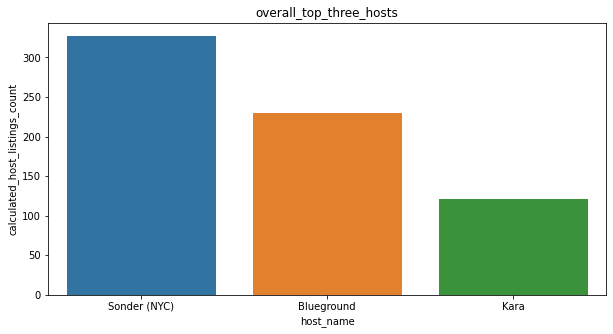

In [17]:

plt.rcParams['figure.figsize']= (10,5)
plt.title('overall_top_three_hosts')
sns.barplot(data=overall_top_three_hosts, x='host_name',y='calculated_host_listings_count')
plt.show()

Thus, it is clear from the above host tables of various neighbourhood groups and bar_graph that Manhattan has the maximum number of host count and Sondar(NYC) has the maximum listing availabity. The reason behind this may be the location of sondar hotels as it lies in the centre of the city.

From the above table, it can be seen that the almost all the high priced hotel/property belongs to either Manhattan or Brooklyn and after doing some google research, I found that rental price of hotel/property can be as high as 10000.
 Now we have to only deal with the hotel/property whose price is $0

In [18]:
# 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
# Most expensive neighbourhood of NYC
expensive_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values('price', ascending= False)
expensive_neighbourhood_group

,neighbourhood_group,price
2,Manhattan,196.880707
1,Brooklyn,124.430661
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.593951


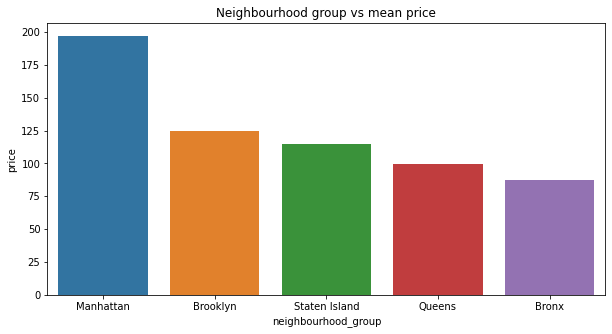

In [19]:
plt.title('Neighbourhood group vs mean price')
sns.barplot(x='neighbourhood_group', y= 'price', data= expensive_neighbourhood_group)
plt.show()

Manhattan is the most expensive neighbourhood group of the newyork.

On doing some google research, these are the main reasons behind this:

1. Manhattan is an immensely desirable place to live, work, and visit. Its access to culture, nightlife, sights, restaurants and other must-dos are unmatched. And for this reason, real estate prices have risen dramatically in Manhattan over the past few decades.

2. Manhattan experiences a high population density, thus creating competition within the city; because space is limited, there's not much land left available for development (and rising land prices make it unaffordable)

In [20]:
# Find neighbourhood group share of hotels/property and average reviews that each neighborhood group got in newyork 
neighbourhoodgroup_df  = airbnb_df.groupby('neighbourhood_group').agg({'reviews_per_month':'mean','neighbourhood_group':'count'})
neighbourhoodgroup_df

,reviews_per_month,neighbourhood_group
neighbourhood_group,,
Bronx,1.475655,1091
Brooklyn,1.049790,20104
Manhattan,0.976782,21661
Queens,1.567076,5666
Staten Island,1.576381,373


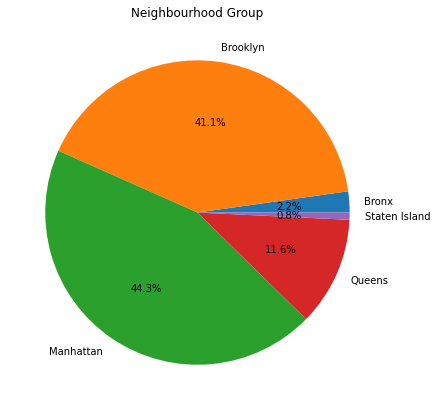

In [21]:
plt.rcParams['figure.figsize']= (10,7)
plt.title("Neighbourhood Group")
plt.pie(neighbourhoodgroup_df['neighbourhood_group'],labels=neighbourhoodgroup_df['neighbourhood_group'].index,autopct='%1.1f%%')
plt.show()

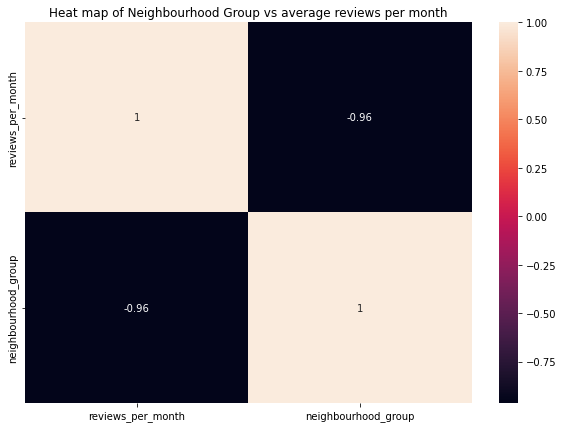

In [22]:
plt.title("Heat map of Neighbourhood Group vs average reviews per month")
plt.rcParams['figure.figsize']= (8,2)
sns.heatmap(neighbourhoodgroup_df.corr(),annot=True)
plt.show()

The pie chart above shows that the Manhattan and Brooklyn has the highest share of hotels/properties. Average reviews per month of Manhattan and Brooklyn are less as compared to the other neighbourhood groups. From the above Heat map of Neighbourhood Group vs average reviews per month, it is clear that the total number of hotels/property available in each neighbourhood group has negative correlation with average review per month. This is the reason why Manhattan and Brooklyn has less average reviews per month.

In [23]:
# Number of different room types listed in different neighbourhood groups
airbnb_df.groupby(['neighbourhood_group','room_type']).agg({'room_type':'count','price':'mean'}).unstack()


room_type                                    price  \
room_type           Entire home/apt Private room Shared room Entire home/apt   
neighbourhood_group                                                            
Bronx                           379          652          60      127.506596   
Brooklyn                       9559        10132         413      178.338634   
Manhattan                     13199         7982         480      249.247140   
Queens                         2096         3372         198      147.050573   
Staten Island                   176          188           9      173.846591   

                                              
room_type           Private room Shared room  
neighbourhood_group                           
Bronx                  66.950920   59.800000  
Brooklyn               76.562870   51.041162  
Manhattan             116.776622   88.977083  
Queens                 71.762456   69.020202  
Staten Island          62.292553   57.444444

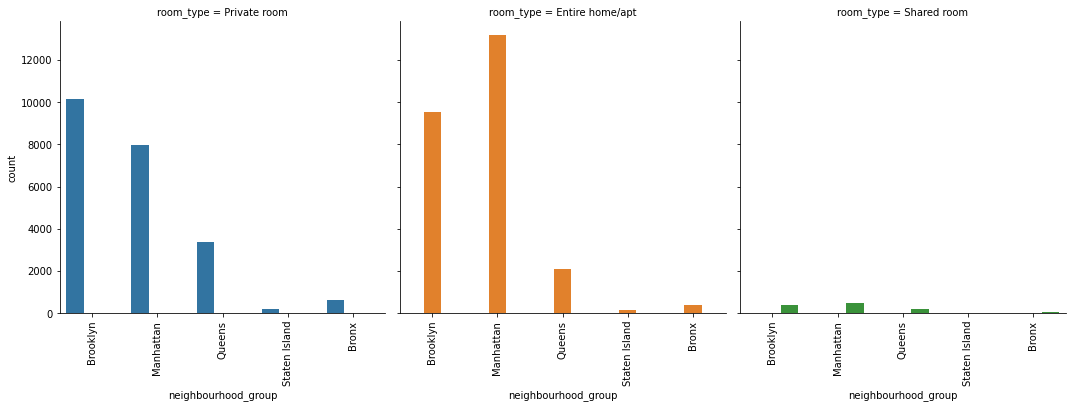

In [24]:
sns.catplot(x='neighbourhood_group' , hue='room_type', data= airbnb_df,col= 'room_type',kind= 'count').set_xticklabels(rotation=90)
plt.show()

The graph shows that the entire Home/Apartment in Manhattan, while Private Rooms and Apartments in Brooklyn are almost equal. Above table shows that the people in NYC go for either private room or entire home/apt. This shows that the people of NYC are more concerned about their privacy irrespective of the cost, that's why they rarely opt for shared rooms.

The rental price of each category of the room are maximum in Manhatten followed by brooklyn. 

In [25]:
# Top three property listing in Manhattan
Manhattan_top_3_property_listing = Manhattan_df.loc[~Manhattan_df['name'].isna(),'name']      # since name column has null values, therefore creating a dataframe in which column('name') has non-null values only  
Manhattan_top_3_property_listing = Manhattan_top_3_property_listing.value_counts().head(3)
Manhattan_top_3_property_listing=pd.DataFrame(Manhattan_top_3_property_listing)
Manhattan_top_3_property_listing.reset_index(inplace=True)
Manhattan_top_3_property_listing.rename(columns={'index':'Top three property listing in Manhattan'}, inplace=True)
Manhattan_top_3_property_listing.drop(['name'],axis= 1 ,inplace= True)
Manhattan_top_3_property_listing 

,Top three property listing in Manhattan
0,Harlem Gem
1,West Village Apartment
2,Cozy East Village Apartment


In [26]:
# Top three property listing in Brooklyn
Brooklyn_top_3_property_listing = Brooklyn_df.loc[~Brooklyn_df['name'].isna(),'name']   # since name column has null values, therefore creating a dataframe in which column('name') has non-null values only
Brooklyn_top_3_property_listing = Brooklyn_top_3_property_listing.value_counts().head(3)
Brooklyn_top_3_property_listing=pd.DataFrame(Brooklyn_top_3_property_listing)
Brooklyn_top_3_property_listing.reset_index(inplace=True)
Brooklyn_top_3_property_listing.rename(columns={'index':'Top three property listing in Brooklyn'}, inplace=True)
Brooklyn_top_3_property_listing.drop(['name'],axis= 1 ,inplace= True)
Brooklyn_top_3_property_listing


,Top three property listing in Brooklyn
0,Brooklyn Apartment
1,Loft Suite @ The Box House Hotel
2,Artsy Private BR in Fort Greene Cumberland


In [28]:
# Top three property listing in Queens
Queens_top_3_property_listing = Queens_df.loc[~Queens_df['name'].isna(),'name']    # since name column has null values, therefore creating a dataframe in which column('name') has non-null values only
Queens_top_3_property_listing = Queens_top_3_property_listing.value_counts().head(3)
Queens_top_3_property_listing=pd.DataFrame(Queens_top_3_property_listing)
Queens_top_3_property_listing.reset_index(inplace=True)
Queens_top_3_property_listing.rename(columns={'index':'Top three property listing in Queens'}, inplace=True)
Queens_top_3_property_listing.drop(['name'],axis= 1 ,inplace= True)
Queens_top_3_property_listing

,Top three property listing in Queens
0,Hillside Hotel
1,Home away from home
2,New york Multi-unit building


In [27]:
# Top three property listing in Bronx
Bronx_top_3_property_listing = Bronx_df.loc[~Bronx_df['name'].isna(),'name']    # since name column has null values, therefore creating a dataframe in which column('name') has non-null values only
Bronx_top_3_property_listing = Bronx_top_3_property_listing.value_counts().head(3)
Bronx_top_3_property_listing=pd.DataFrame(Bronx_top_3_property_listing)
Bronx_top_3_property_listing.reset_index(inplace=True)
Bronx_top_3_property_listing.rename(columns={'index':'Top three property listing in Bronx'}, inplace=True)
Bronx_top_3_property_listing.drop(['name'],axis= 1 ,inplace= True)
Bronx_top_3_property_listing

,Top three property listing in Bronx
0,Prolonged Traveler's Dream (a month first & more)
1,Room with a View
2,Cozy home away from home


In [29]:
# Top three property listing in Staten Island
Staten_Island_top_3_property_listing = Staten_Island_df.loc[~Staten_Island_df['name'].isna(),'name']    # since name column has null values, therefore creating a dataframe in which column('name') has non-null values only
Staten_Island_top_3_property_listing = Staten_Island_top_3_property_listing.value_counts().head(3)
Staten_Island_top_3_property_listing=pd.DataFrame(Staten_Island_top_3_property_listing)
Staten_Island_top_3_property_listing.reset_index(inplace=True)
Staten_Island_top_3_property_listing.rename(columns={'index':'Top three property listing in Staten Island'}, inplace=True)
Staten_Island_top_3_property_listing.drop(['name'],axis= 1 ,inplace= True)
Staten_Island_top_3_property_listing

,Top three property listing in Staten Island
0,New York home ferry ride from Manhattan.
1,New York room with a view
2,Shared Loft in Charming Guest Suite (Front Right)


In [30]:
# Top 10 neighbourhoods of Manhattan

Manhattan_df['neighbourhood'].value_counts().head(10)

Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [31]:
# Listing of room types in Manhatten top ten neighbourhood
Manhatten_top_10_neighbourhood =Manhattan_df.loc[airbnb_df['neighbourhood'].isin(["Harlem","Upper West Side","Hell's Kitchen","East Village","Upper East Side","Midtown","East Harlem","Chelsea","Lower East Side","Washington Heights"])]
Manhatten_top_10_neighbourhood.groupby(['neighbourhood','room_type']).agg({'room_type':'count','price':'mean'}).unstack()

room_type                                    price  \
room_type          Entire home/apt Private room Shared room Entire home/apt   
neighbourhood                                                                 
Chelsea                        820          278          15      283.262195   
East Harlem                    486          586          45      189.545267   
East Village                  1170          660          23      226.305983   
Harlem                        1036         1573          49      177.595560   
Hell's Kitchen                1187          672          99      254.242628   
Lower East Side                506          367          38      234.397233   
Midtown                       1100          422          23      301.268182   
Upper East Side               1310          441          47      216.908397   
Upper West Side               1256          675          40      262.045382   
Washington Heights             296          576          27      137.270270   

                                             
room_type          Private room Shared room  
neighbourhood                                
Chelsea              156.741007  140.666667  
East Harlem           91.701365   65.044444  
East Village         118.333333   84.086957  
Harlem                81.950413   68.081633  
Hell's Kitchen       133.501488   95.838384  
Lower East Side      134.054496   50.736842  
Midtown              244.428910   98.130435  
Upper East Side      117.097506   83.808511  
Upper West Side      122.640000   95.225000  
Washington Heights    66.102431   68.629630

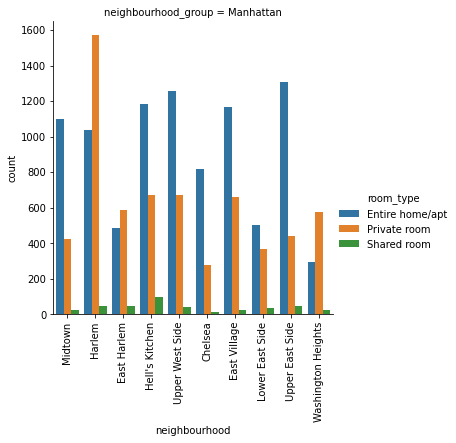

In [32]:
# Listing of room types in Manhatten top ten neighbourhood graphically
sns.catplot(x='neighbourhood', hue='room_type',col= 'neighbourhood_group', data= Manhatten_top_10_neighbourhood, kind='count').set_xticklabels(rotation=90)
plt.show()

From the above graph, it is clear that 'Shared room' type Airbnb listing is rarely present in the Manhatten top ten neighbourhoods.

Harelem has the most listing room availability because this area is famous for its elegant brownstones , various restaurant rows and also it is not that expensive yearly dining event.

Washington heights has least listing room availability among the Marhatten top ten neighborhoods.Though it is cheapest among the top ten neighbourhoods but this area doesn't have chain stores like other neighbourhoods.

In [33]:
# Top 10 neighbourhoods of Brooklyn
Brooklyn_df['neighbourhood'].value_counts().head(10)

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Name: neighbourhood, dtype: int64

In [34]:
# Listing of room types in Brooklyn top ten neighbourhood
Brooklyn_top_10_neighbourhood =Brooklyn_df.loc[airbnb_df['neighbourhood'].isin(["Williamsburg","Bedford-Stuyvesant","Bushwick","Crown Heights","Greenpoint","Flatbush","Clinton Hill","Prospect-Lefferts Gardens","Park Slope","East Flatbush"])]
Brooklyn_top_10_neighbourhood.groupby(['neighbourhood','room_type']).agg({'room_type':'count','price':'mean'}).unstack()

room_type                           \
room_type                 Entire home/apt Private room Shared room   
neighbourhood                                                        
Bedford-Stuyvesant                   1591         2038          85   
Bushwick                              678         1719          68   
Clinton Hill                          346          217           9   
Crown Heights                         759          780          25   
East Flatbush                         187          289          24   
Flatbush                              261          339          21   
Greenpoint                            622          476          17   
Park Slope                            366          139           1   
Prospect-Lefferts Gardens             281          242          12   
Williamsburg                         1891         1997          32   

                                    price                           
room_type                 Entire home/apt Private room Shared room  
neighbourhood                                                       
Bedford-Stuyvesant             154.780641    73.504907   50.376471  
Bushwick                       145.784661    62.684700   40.500000  
Clinton Hill                   243.982659    88.405530   49.000000  
Crown Heights                  159.631094    68.573077   50.880000  
East Flatbush                  130.855615    92.159170   41.958333  
Flatbush                       126.735632    67.823009   56.857143  
Greenpoint                     190.115756    88.684874   65.705882  
Park Slope                     205.860656    99.215827   78.000000  
Prospect-Lefferts Gardens      150.074733    67.917355   38.166667  
Williamsburg                   206.150185    85.761142   84.937500

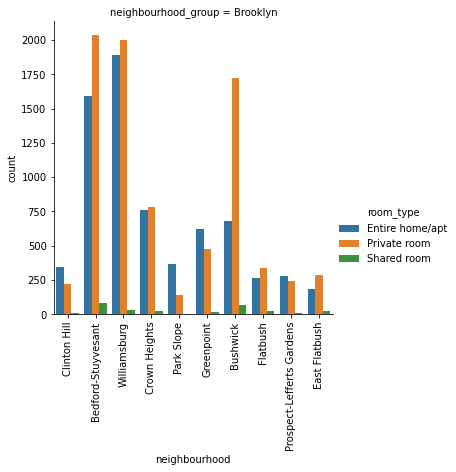

In [35]:
# Listing of room types in Brooklyn top ten neighbourhood graphically
sns.catplot(x='neighbourhood', hue='room_type',col= 'neighbourhood_group', data= Brooklyn_top_10_neighbourhood, kind='count').set_xticklabels(rotation=90)
plt.show()

From the above graph, it is clear that 'Shared room' type Airbnb listing is
rarely present in the Broklyn top ten neighbourhoods.

 Bedford-Stuyvesant and Williamsburg has the most listing room availability because both of these neighbourhood are best for millennials, families and neighbourhood vibes. East flatbush has least listing room availability among the Brooklyn top ten neighborhoods because this neighbourhood offers the suburban Vibes.

In [36]:
# Availabilty of room among various neighbourhood groups
room_availabilty_df=airbnb_df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().unstack()
room_availabilty_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,158.000000,171.331288,154.216667
Brooklyn,97.205147,99.917983,178.007264
Manhattan,117.140996,101.845026,138.572917
Queens,132.267176,149.222716,192.186869
Staten Island,178.073864,226.361702,64.777778


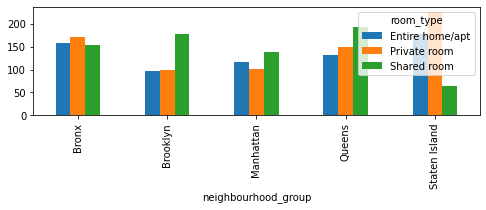

In [37]:
# Availabilty of rooms among various neighbourhood groups graphically
room_availabilty_df.plot(kind= 'bar')
plt.show()

Room availability in staten island is highest among all the groups because of its distance from the rest of the city.

In [38]:
# Which hosts are the busiest and why?
host_df=  airbnb_df.loc[~airbnb_df['host_name'].isna() & ~airbnb_df['reviews_per_month'].isna()] 
busy_host_df= host_df.groupby(['host_id','host_name','neighbourhood_group']).agg({'number_of_reviews':'mean'}).reset_index().sort_values('number_of_reviews', ascending= False).head(10)
busy_host_df

,host_id,host_name,neighbourhood_group,number_of_reviews
23558,47621202,Dona,Queens,602.500000
7382,4734398,Jj,Manhattan,599.333333
4383,2369681,Carol,Manhattan,540.000000
13150,12949460,Asa,Brooklyn,488.000000
1870,792159,Wanda,Brooklyn,480.000000
21369,37312959,Maya,Queens,454.600000
4297,2321321,Lloyd,Queens,454.000000
845,277379,Agnes,Manhattan,448.500000
944,307962,Dennis & Naoko,Queens,441.000000
28776,97086824,Miss Dy,Queens,434.000000


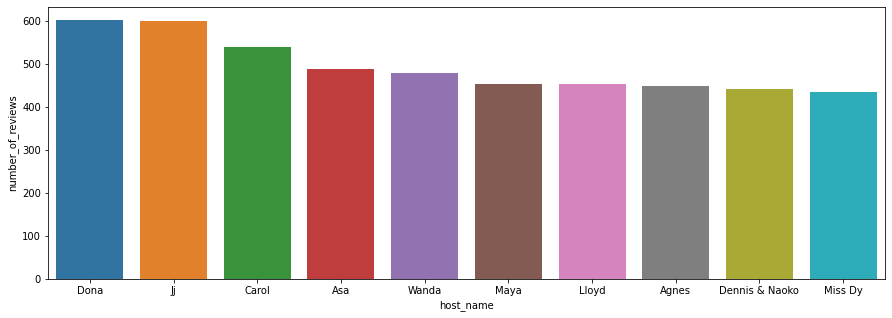

In [39]:
plt.rcParams['figure.figsize']= (15,5)
sns.barplot(x='host_name',y='number_of_reviews', data= busy_host_df)
plt.show()

From above graph and busy host table, it is clear that among the top ten busiest host,most of the hosts are from Queens followed by Manhattan and Brooklyn.

Queen is one of the safest neighbourhood in NYC and also a great place for families to buy a home. Compared to neighbourhood group like Manhattan and Brooklyn, Queens has a significantly lower cost of living. This is the reason behind the high frequency of busiest hosts from Queens.

In [40]:
# Traffic in each neghbourhood group
traffic_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group','room_type']).agg({'reviews_per_month':'mean','price':'mean'}).unstack()
traffic_neighbourhood_group


reviews_per_month                           \
room_type             Entire home/apt Private room Shared room   
neighbourhood_group                                              
Bronx                        1.824749     1.319371    0.968833   
Brooklyn                     1.125341     0.990650    0.752010   
Manhattan                    0.862068     1.145254    1.329646   
Queens                       1.635038     1.548200    1.169091   
Staten Island                1.767955     1.437074    0.740000   

                              price                           
room_type           Entire home/apt Private room Shared room  
neighbourhood_group                                           
Bronx                    127.506596    66.950920   59.800000  
Brooklyn                 178.338634    76.562870   51.041162  
Manhattan                249.247140   116.776622   88.977083  
Queens                   147.050573    71.762456   69.020202  
Staten Island            173.846591    62.292553   57.444444

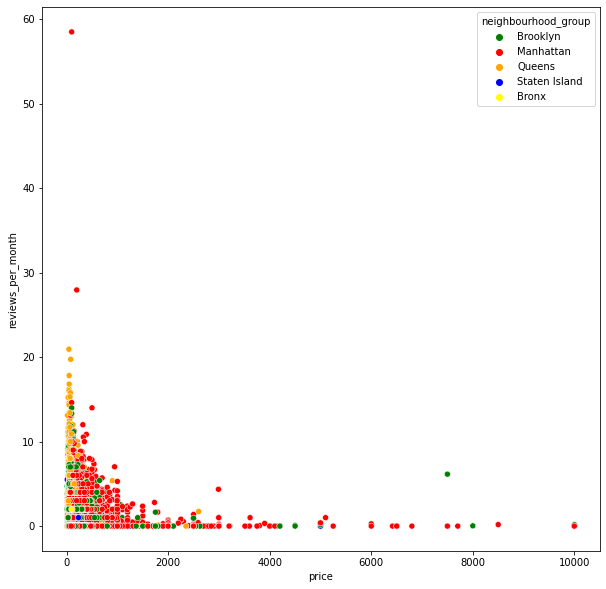

In [41]:
plt.rcParams['figure.figsize']= (10,10)
sns.scatterplot(x='price',y='reviews_per_month',hue='neighbourhood_group',palette=['green','red','orange','blue','yellow'],legend='full',data=airbnb_df)
plt.show()

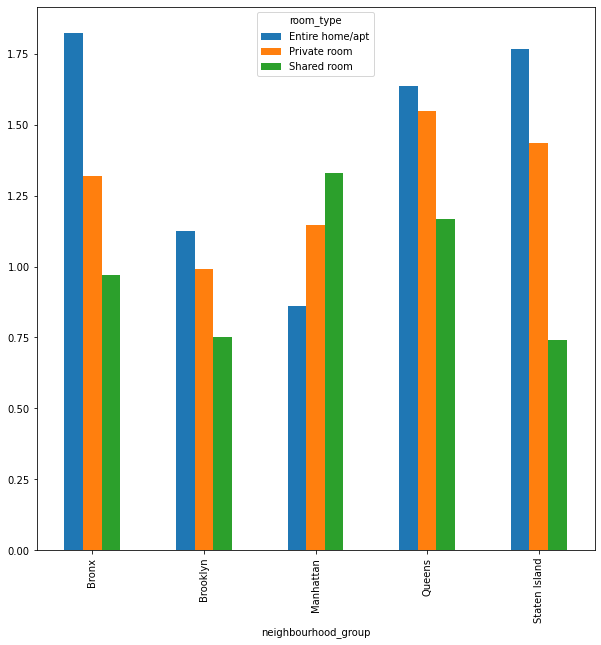

In [42]:
traffic_neighbourhood_group['reviews_per_month'].plot(kind= 'bar')
plt.show()

From the above graph and traffic table, it is clear that 

1. Room type: Entire home/apt of Bronx has the highest traffic among all and the reason behind that may be the rates of entire room/apt is minimum among all the groups.
2. Room type: Private rooms of Queens has the highest traffic among all the groups. There is a very minute difference of $2.5 between the mean price of private rooms and shared rooms in Queens. Also private rooms provide privacy also. That's why people choose private rooms over shared rooms in Queens. 
3. Room type: Shared rooms of Manhatten has the highest traffic among all groups. Manhatten is a very expensive neighbourhood group of newyork and the rates of shared rooms is minimum as compared to the other room types in Manhatten. This might be the reason behind the highest traffic in shared room category in Manhatten.